Welcome to Bulls and Cows!
I have generated a 4-digit secret code with unique digits.
Try to guess it!
Enter your guess (4 unique digits): 1234
Bulls: 1, Cows: 1
Remaining possible codes: 720
Entropy: 9.49 bits


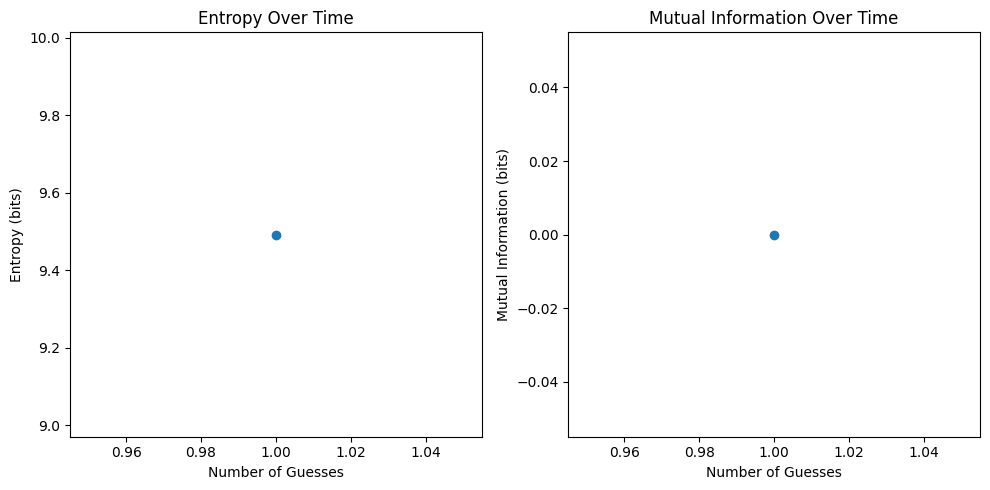

Enter your guess (4 unique digits): 5678
Bulls: 0, Cows: 2
Remaining possible codes: 168
Entropy: 7.39 bits


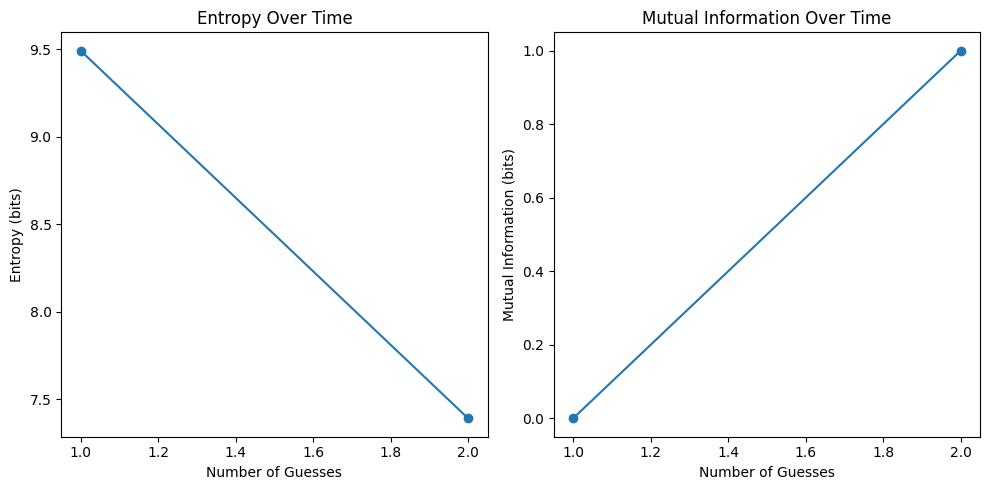

Enter your guess (4 unique digits): 1278
Bulls: 0, Cows: 1
Remaining possible codes: 28
Entropy: 4.81 bits


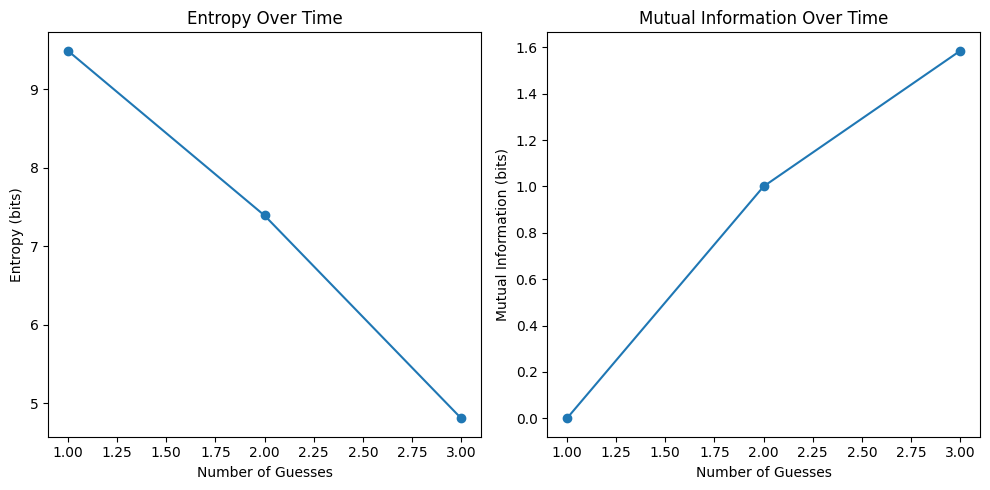

Enter your guess (4 unique digits): 5634
Bulls: 1, Cows: 2
Remaining possible codes: 28
Entropy: 4.81 bits


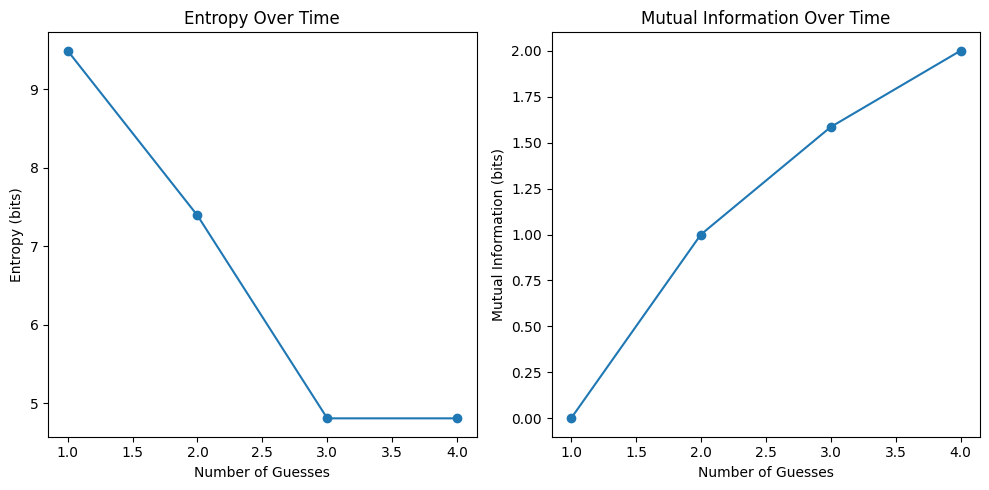

Enter your guess (4 unique digits): 5734
Bulls: 1, Cows: 1
Remaining possible codes: 13
Entropy: 3.70 bits


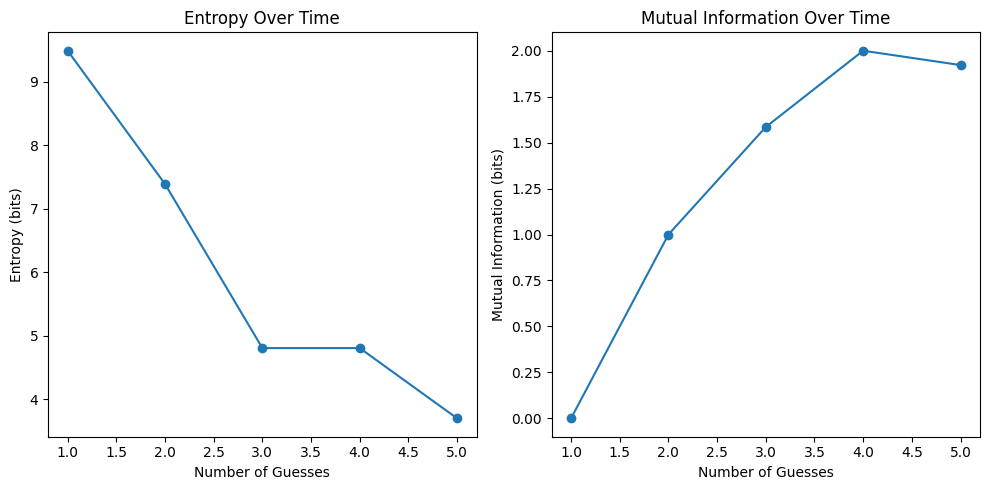

Enter your guess (4 unique digits): 5632
Bulls: 0, Cows: 3
Remaining possible codes: 2
Entropy: 1.00 bits


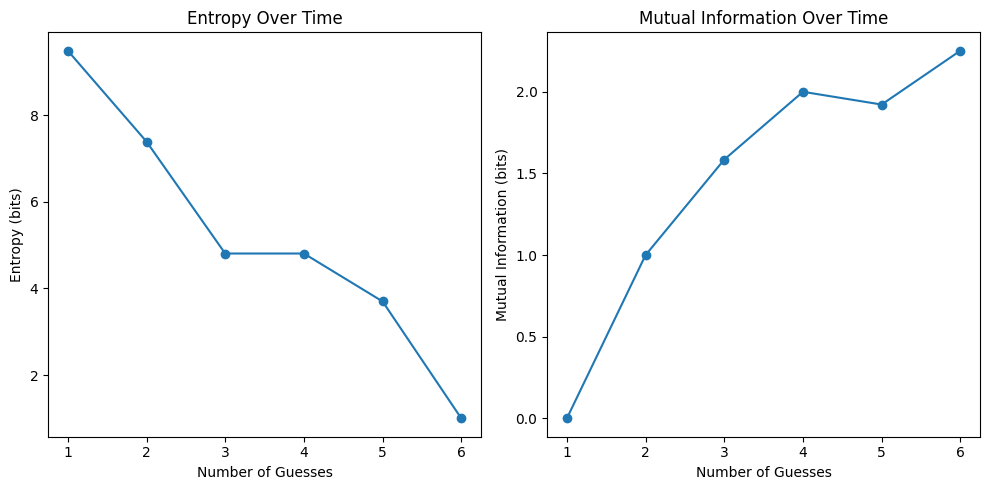

Enter your guess (4 unique digits): 5624
Bulls: 2, Cows: 2
Remaining possible codes: 1
Entropy: -0.00 bits


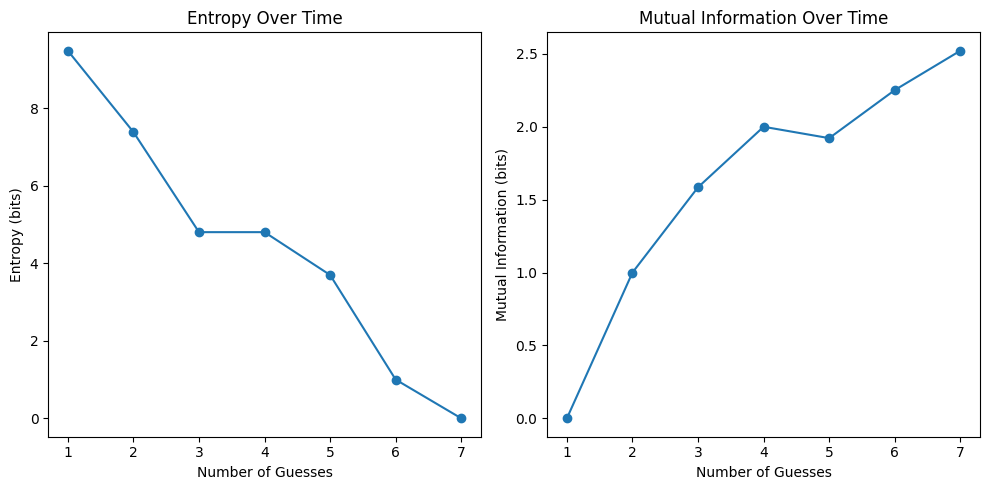

Enter your guess (4 unique digits): 6524
Bulls: 4, Cows: 0
Congratulations! You guessed the code in 8 attempts!


In [2]:
import random
import math
import itertools
from collections import Counter
import matplotlib.pyplot as plt

def generate_secret_code():
    """Generate a 4-digit secret code with unique digits."""
    digits = list(range(10))
    random.shuffle(digits)
    return ''.join(map(str, digits[:4]))

def calculate_bulls_and_cows(secret, guess):
    """Calculate the number of bulls and cows for a given guess."""
    bulls = sum(s == g for s, g in zip(secret, guess))
    cows = len(set(secret) & set(guess)) - bulls
    return bulls, cows

def calculate_entropy(remaining_codes):
    """Calculate Shannon entropy for the remaining valid codes."""
    total = len(remaining_codes)
    if total == 0:
        return 0
    probabilities = [1 / total] * total  # Uniform probabilities
    return -sum(p * math.log2(p) for p in probabilities)

def filter_possible_codes(possible_codes, guess, bulls, cows):
    """Filter the possible codes based on the guess and its result."""
    return [
        code for code in possible_codes
        if calculate_bulls_and_cows(code, guess) == (bulls, cows)
    ]

def calculate_mutual_information(possible_codes, guesses):
    """
    Calculate mutual information between guesses and Bulls/Cows outcomes.
    I(X; Y) = H(Y) - H(Y|X)
    """
    if not guesses or not possible_codes:
        return 0

    # H(Y): Entropy of all possible outcomes
    total_codes = len(possible_codes)
    outcomes = [
        calculate_bulls_and_cows(code, guess)
        for code in possible_codes
        for guess in guesses
    ]
    outcome_counts = Counter(outcomes)
    H_Y = -sum(
        (count / len(outcomes)) * math.log2(count / len(outcomes))
        for count in outcome_counts.values() if count > 0
    )

    # H(Y|X): Average conditional entropy across guesses
    H_Y_given_X = 0
    for guess in guesses:
        conditional_outcomes = [
            calculate_bulls_and_cows(code, guess) for code in possible_codes
        ]
        conditional_counts = Counter(conditional_outcomes)
        total_given_guess = sum(conditional_counts.values())
        H_Y_given_X += -sum(
            (count / total_given_guess) * math.log2(count / total_given_guess)
            for count in conditional_counts.values() if count > 0
        )
    H_Y_given_X /= len(guesses)

    # Mutual information
    return H_Y - H_Y_given_X

def main():
    secret_code = generate_secret_code()
    print("Welcome to Bulls and Cows!")
    print("I have generated a 4-digit secret code with unique digits.")
    print("Try to guess it!")

    # Generate all possible 4-digit codes with unique digits
    possible_codes = [
        ''.join(map(str, digits)) for digits in itertools.permutations(range(10), 4)
    ]

    guesses = 0
    guess_history = []

    # For plotting
    entropy_values = []
    mutual_information_values = []

    while True:
        guess = input("Enter your guess (4 unique digits): ")
        if len(guess) != 4 or not guess.isdigit() or len(set(guess)) != 4:
            print("Invalid guess. Make sure it's 4 unique digits.")
            continue

        guesses += 1
        guess_history.append(guess)

        # Calculate Bulls and Cows
        bulls, cows = calculate_bulls_and_cows(secret_code, guess)
        print(f"Bulls: {bulls}, Cows: {cows}")

        # Check if the player has guessed the code
        if bulls == 4:
            print(f"Congratulations! You guessed the code in {guesses} attempts!")
            break

        # Filter remaining possible codes
        possible_codes = filter_possible_codes(possible_codes, guess, bulls, cows)

        if not possible_codes:
            print("No possible codes match the constraints. There may be an issue with the input or filtering logic.")
            break

        # Calculate and display entropy
        entropy = calculate_entropy(possible_codes)
        entropy_values.append(entropy)

        # Calculate and display mutual information
        mutual_information = calculate_mutual_information(possible_codes, guess_history)
        mutual_information_values.append(mutual_information)

        # Print remaining possible codes and entropy
        print(f"Remaining possible codes: {len(possible_codes)}")
        print(f"Entropy: {entropy:.2f} bits")

        # Plot entropy and mutual information graphs
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, guesses + 1), entropy_values, marker='o')
        plt.xlabel('Number of Guesses')
        plt.ylabel('Entropy (bits)')
        plt.title('Entropy Over Time')

        plt.subplot(1, 2, 2)
        plt.plot(range(1, guesses + 1), mutual_information_values, marker='o')
        plt.xlabel('Number of Guesses')
        plt.ylabel('Mutual Information (bits)')
        plt.title('Mutual Information Over Time')

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()
